In [1]:
using Oceananigans

grid = RectilinearGrid(size=(128, 128), x=(0, 2π), y=(0, 2π), topology=(Periodic, Periodic, Flat))
model = NonhydrostaticModel(; grid, advection=WENO())

ϵ(x, y, z) = 2rand() - 1
set!(model, u=ϵ, v=ϵ)

simulation = Simulation(model; Δt=0.01, stop_iteration=100)
run!(simulation)

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (78.841 ms)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (6.389 seconds).
[ Info: Simulation is stopping after running for 8.009 seconds.
[ Info: Model iteration 100 equals or exceeds stop iteration 100.


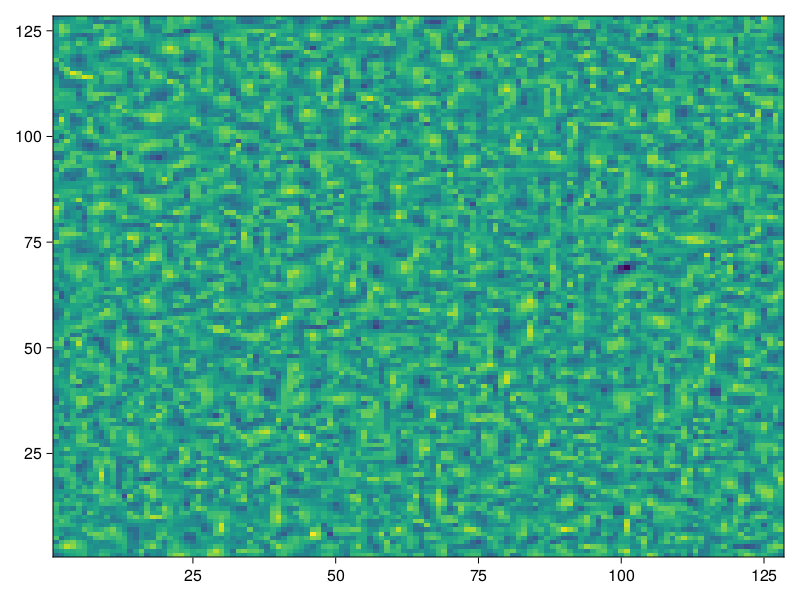

In [6]:
using CairoMakie

u, v, w = model.velocities
ζ = Field(∂x(v) - ∂y(u))
compute!(ζ)

heatmap(interior(ζ, :, :, 1))

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (160.873 ms)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (13.772 ms).
[ Info: Simulation is stopping after running for 20.077 seconds.
[ Info: Model iteration 1700 equals or exceeds stop iteration 1700.


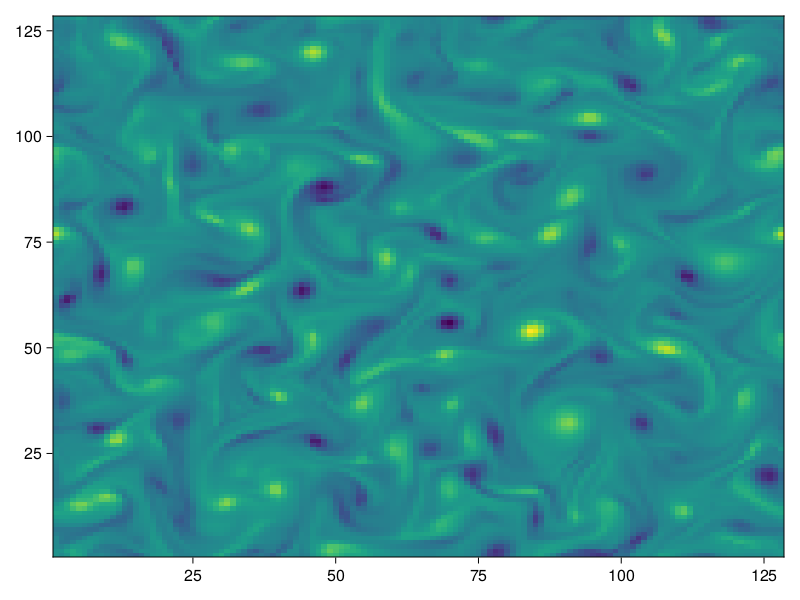

In [7]:
simulation.stop_iteration += 1600
run!(simulation)

compute!(ζ)
heatmap(interior(ζ, :, :, 1))

In [8]:
using Oceananigans

grid = RectilinearGrid(GPU(), size=(128, 128), x=(0, 2π), y=(0, 2π), topology=(Periodic, Periodic, Flat))
model = NonhydrostaticModel(; grid, advection=WENO())

ϵ(x, y, z) = 2rand() - 1
set!(model, u=ϵ, v=ϵ)

simulation = Simulation(model; Δt=0.01, stop_iteration=100)
run!(simulation)

LoadError: ArgumentError: Cannot create a GPU grid. No CUDA-enabled GPU was detected!